# Morphology Analysis

In [102]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os
sys.path.append('../src')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
from ds import Trie, MorphGraph
import networkx as nx
from matplotlib import pyplot as plt

In [194]:
words = ["UNIDO", "BONDAD",
         "FELIZ", "FELICIDAD",
         "CAPAZ", "CAPACIDAD",
         "INFELIZ", "INCAPAZ",
         "INFELICIDAD", "INCAPACIDAD"
        ]

In [36]:
pref_trie = Trie.build(words)
suf_trie = Trie.build(w[::-1] for w in words)

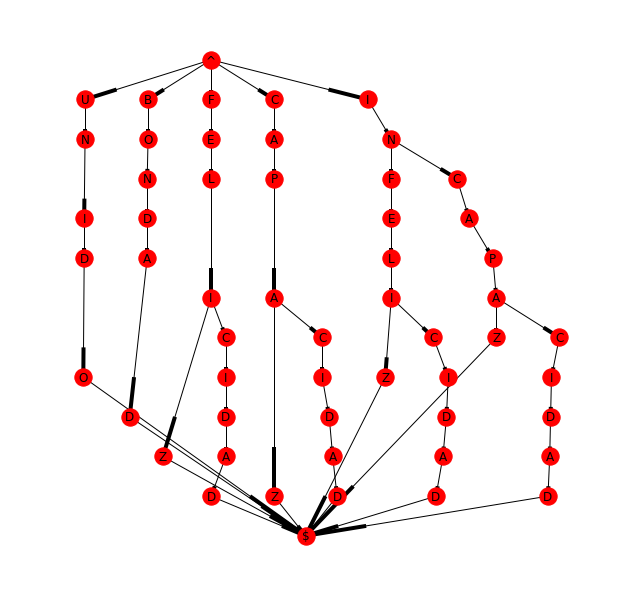

In [195]:
pref_trie.name='^'
G = nx.DiGraph()
G.add_node('$')
G.add_nodes_from(pref_trie.bfs_nodes())
G.add_edges_from(pref_trie.bfs_edges())
G.add_edges_from((x, '$') for x in pref_trie.bfs_nodes() if x.is_term)
plt.figure(figsize=(8,8))
pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True, font_size=12)

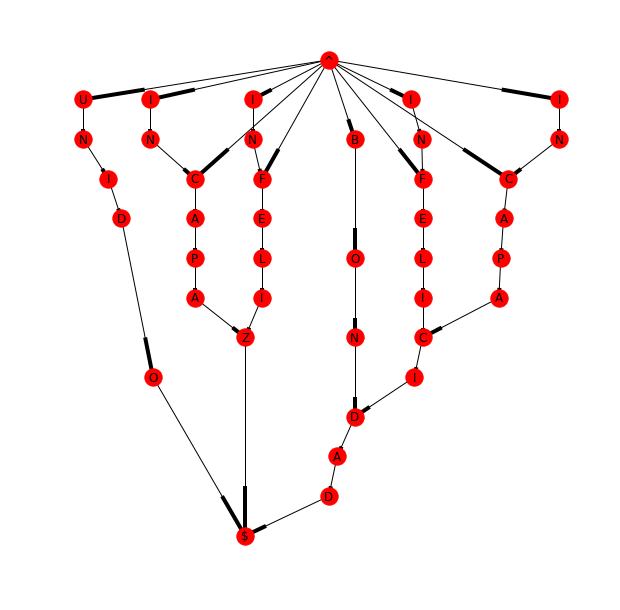

In [38]:
suf_trie.name = '$'
G2 = nx.DiGraph()
G2.add_node('^')
G2.add_nodes_from(suf_trie.bfs_nodes())
G2.add_edges_from((y, x) for x,y in suf_trie.bfs_edges())
G2.add_edges_from(('^', x) for x in suf_trie.bfs_nodes() if x.is_term)
plt.figure(figsize=(8,8))
pos2 = nx.nx_pydot.graphviz_layout(G2, prog='dot')
nx.draw(G2, pos2, with_labels=True, arrows=True, font_size=12)

## Merge

In [48]:
MG = MorphGraph(name="Test Graph", words=words)

32 edges 


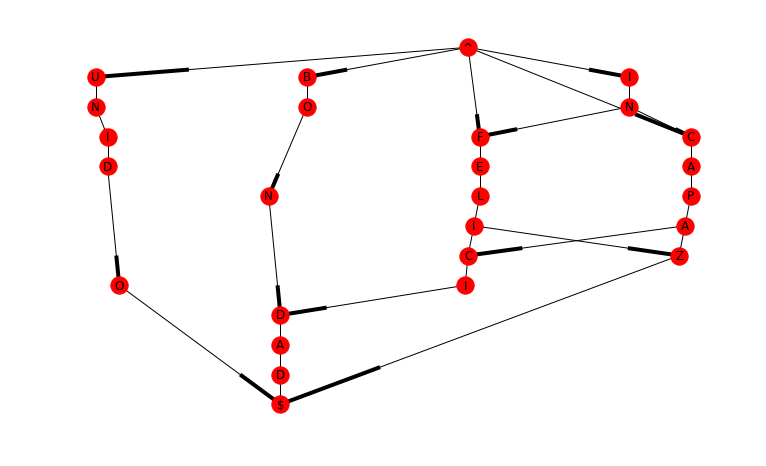

In [52]:
DG = MG.to_networkx()
plt.figure(figsize=(10,6))
pos3 = nx.nx_pydot.graphviz_layout(DG, prog='dot')
nx.draw(DG, pos3, with_labels=True, arrows=True, font_size=12)

In [188]:
file = "words_alpha.txt"
with open(file) as f:
    words_all = [l.strip().upper() for l in f]

print(len(words_all))
words_all = words_all[:100]
print(len(words_all))

370099
100


In [190]:
from ds import Trie, MorphGraph
mg_big = MorphGraph(name="All", words=words_all)

188 edges 


In [191]:
DG = nx.DiGraph()
DG.add_nodes_from(mg_big.get_nodes())
edges = ((e.start, e.end,
          {'label': e.name} if e.name=='ϵ' else {})
         for e in mg_big.get_edges())
DG.add_edges_from(edges)

'''
plt.figure(figsize=(10, 10))
pos3 = nx.nx_pydot.graphviz_layout(DG, prog='dot')
nx.draw(DG, pos3, with_labels=True, arrows=True, font_size=20)
'''
pass

In [141]:
from networkx.drawing.nx_pydot import write_dot

In [192]:
write_dot(DG, 'graph.dot')

In [143]:
!ls

001-morph-intro.ipynb file.dot              som-eng.ttab
2 Gloves.ipynb        graph.dot             words_alpha.txt
Notebook1.ipynb       som-eng-dev-v1.tsv


In [193]:
!atom graph.dot